In [20]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K
import random
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_test.shape

(10000,)

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
def set_up_model(conv_exponent, n_dense):
    keras.backend.clear_session()
    inputs = Input(shape=input_shape)
    x = Conv2D(2**conv_exponent, kernel_size=(3,3), strides=(1, 1), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = Conv2D(2**(conv_exponent+1), kernel_size=(3,3), strides=(1,1), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = Flatten()(x)
    x = Dense(n_dense, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

In [8]:
histories = []
dense_ns = [16, 32, 64, 128, 256]
exponents = [0, 1, 2, 3, 4, 5]

In [9]:
batch_size = 128
epochs = 10

for i, n_dense in enumerate(dense_ns):
        for j, exp in enumerate(exponents):        
            model = set_up_model(exp, n_dense)
            history = model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=2,
                          validation_data=(x_test, y_test))
            histories.append(history.history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.6690 - acc: 0.7816 - val_loss: 0.3041 - val_acc: 0.9057
Epoch 2/10
 - 6s - loss: 0.2944 - acc: 0.9102 - val_loss: 0.2353 - val_acc: 0.9297
Epoch 3/10
 - 6s - loss: 0.2383 - acc: 0.9270 - val_loss: 0.1924 - val_acc: 0.9435
Epoch 4/10
 - 6s - loss: 0.2020 - acc: 0.9380 - val_loss: 0.1697 - val_acc: 0.9487
Epoch 5/10
 - 6s - loss: 0.1806 - acc: 0.9448 - val_loss: 0.1500 - val_acc: 0.9551
Epoch 6/10
 - 7s - loss: 0.1661 - acc: 0.9485 - val_loss: 0.1534 - val_acc: 0.9556
Epoch 7/10
 - 7s - loss: 0.1554 - acc: 0.9525 - val_loss: 0.1406 - val_acc: 0.9586
Epoch 8/10
 - 7s - loss: 0.1485 - acc: 0.9544 - val_loss: 0.1328 - val_acc: 0.9599
Epoch 9/10
 - 7s - loss: 0.1411 - acc: 0.9566 - val_loss: 0.1307 - val_acc: 0.9599
Epoch 10/10
 - 7s - loss: 0.1358 - acc: 0.9584 - val_loss: 0.1310 - val_acc: 0.9615
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.4952 - acc: 0.8413 - val_loss: 0.1744 - va

Epoch 4/10
 - 22s - loss: 0.0353 - acc: 0.9893 - val_loss: 0.0358 - val_acc: 0.9874
Epoch 5/10
 - 22s - loss: 0.0285 - acc: 0.9912 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 6/10
 - 22s - loss: 0.0235 - acc: 0.9926 - val_loss: 0.0283 - val_acc: 0.9909
Epoch 7/10
 - 23s - loss: 0.0206 - acc: 0.9932 - val_loss: 0.0278 - val_acc: 0.9907
Epoch 8/10
 - 23s - loss: 0.0171 - acc: 0.9947 - val_loss: 0.0380 - val_acc: 0.9892
Epoch 9/10
 - 22s - loss: 0.0140 - acc: 0.9959 - val_loss: 0.0258 - val_acc: 0.9917
Epoch 10/10
 - 22s - loss: 0.0119 - acc: 0.9963 - val_loss: 0.0292 - val_acc: 0.9913
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.5498 - acc: 0.8264 - val_loss: 0.2313 - val_acc: 0.9296
Epoch 2/10
 - 7s - loss: 0.2064 - acc: 0.9369 - val_loss: 0.1614 - val_acc: 0.9520
Epoch 3/10
 - 7s - loss: 0.1580 - acc: 0.9516 - val_loss: 0.1248 - val_acc: 0.9634
Epoch 4/10
 - 7s - loss: 0.1316 - acc: 0.9595 - val_loss: 0.1237 - val_acc: 0.9621
Epoch 5/10
 - 7s - loss: 0.11

Epoch 7/10
 - 12s - loss: 0.0192 - acc: 0.9942 - val_loss: 0.0347 - val_acc: 0.9894
Epoch 8/10
 - 12s - loss: 0.0169 - acc: 0.9949 - val_loss: 0.0303 - val_acc: 0.9899
Epoch 9/10
 - 12s - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0263 - val_acc: 0.9911
Epoch 10/10
 - 12s - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0324 - val_acc: 0.9895
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 23s - loss: 0.2219 - acc: 0.9302 - val_loss: 0.0517 - val_acc: 0.9840
Epoch 2/10
 - 23s - loss: 0.0530 - acc: 0.9835 - val_loss: 0.0607 - val_acc: 0.9806
Epoch 3/10
 - 23s - loss: 0.0368 - acc: 0.9888 - val_loss: 0.0321 - val_acc: 0.9894
Epoch 4/10
 - 23s - loss: 0.0277 - acc: 0.9918 - val_loss: 0.0314 - val_acc: 0.9897
Epoch 5/10
 - 23s - loss: 0.0215 - acc: 0.9937 - val_loss: 0.0245 - val_acc: 0.9912
Epoch 6/10
 - 23s - loss: 0.0169 - acc: 0.9949 - val_loss: 0.0265 - val_acc: 0.9918
Epoch 7/10
 - 23s - loss: 0.0134 - acc: 0.9959 - val_loss: 0.0233 - val_acc: 0.9926
Epoch 8/10
 - 23s - loss:

(0.9, 1.0)

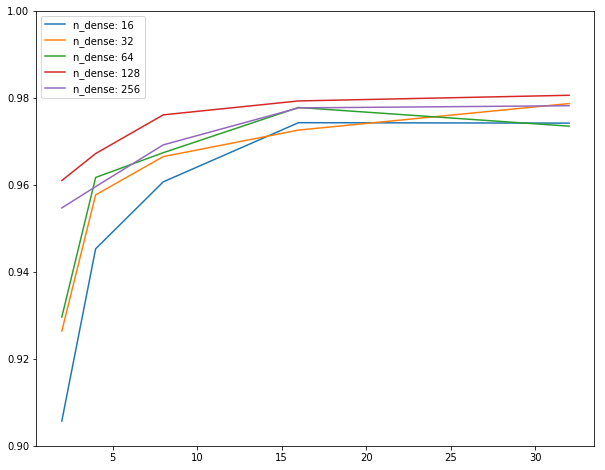

In [24]:
plt.gcf().set_size_inches([10,8])
for i in range(5):
    plt.plot(2**np.array(exponents), [min(hist['val_acc']) for hist in histories[i*5:i*5+5]], label='n_dense: %d'%dense_ns[i])
plt.legend()
plt.ylim(0.9, 1.0)

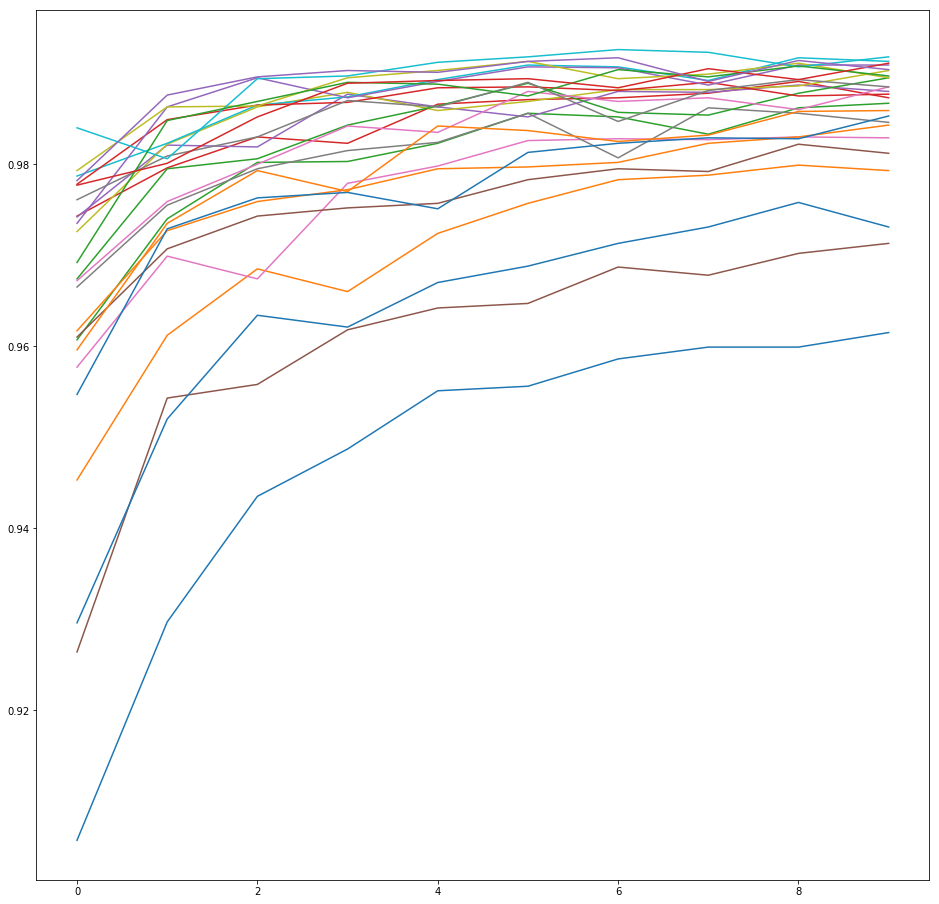

In [23]:
plt.gcf().set_size_inches([16,16])
for hist in histories:
    plt.plot(hist['val_acc'])

In [33]:
def set_up_single_layer_model(conv_exponent, n_dense):
    keras.backend.clear_session()
    inputs = Input(shape=input_shape)
    x = Conv2D(2**(conv_exponent+1), kernel_size=(3,3), strides=(1, 1), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = Flatten()(x)
    x = Dense(n_dense, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

In [34]:
histories_single_conv = []

In [35]:
for i, n_dense in enumerate(dense_ns):
    print(i)
    for j, exp in enumerate(exponents):      
        model = set_up_single_layer_model(exp, n_dense)
        history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=2,
                      validation_data=(x_test, y_test))
        histories_single_conv.append(history.history)

0
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.4945 - acc: 0.8475 - val_loss: 0.2598 - val_acc: 0.9242
Epoch 2/10
 - 5s - loss: 0.2461 - acc: 0.9280 - val_loss: 0.2228 - val_acc: 0.9358
Epoch 3/10
 - 5s - loss: 0.2183 - acc: 0.9364 - val_loss: 0.2225 - val_acc: 0.9366
Epoch 4/10
 - 8s - loss: 0.2024 - acc: 0.9408 - val_loss: 0.1868 - val_acc: 0.9441
Epoch 5/10
 - 6s - loss: 0.1881 - acc: 0.9450 - val_loss: 0.1758 - val_acc: 0.9480
Epoch 6/10
 - 6s - loss: 0.1749 - acc: 0.9495 - val_loss: 0.1769 - val_acc: 0.9477
Epoch 7/10
 - 7s - loss: 0.1608 - acc: 0.9529 - val_loss: 0.1588 - val_acc: 0.9547
Epoch 8/10
 - 6s - loss: 0.1467 - acc: 0.9572 - val_loss: 0.1437 - val_acc: 0.9569
Epoch 9/10
 - 6s - loss: 0.1335 - acc: 0.9609 - val_loss: 0.1363 - val_acc: 0.9599
Epoch 10/10
 - 5s - loss: 0.1230 - acc: 0.9639 - val_loss: 0.1236 - val_acc: 0.9640
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.3998 - acc: 0.8795 - val_loss: 0.1718 - 

Epoch 4/10
 - 29s - loss: 0.0484 - acc: 0.9858 - val_loss: 0.0526 - val_acc: 0.9825
Epoch 5/10
 - 28s - loss: 0.0397 - acc: 0.9883 - val_loss: 0.0469 - val_acc: 0.9841
Epoch 6/10
 - 29s - loss: 0.0337 - acc: 0.9898 - val_loss: 0.0461 - val_acc: 0.9843
Epoch 7/10
 - 27s - loss: 0.0285 - acc: 0.9916 - val_loss: 0.0474 - val_acc: 0.9848
Epoch 8/10
 - 28s - loss: 0.0243 - acc: 0.9928 - val_loss: 0.0477 - val_acc: 0.9849
Epoch 9/10
 - 29s - loss: 0.0205 - acc: 0.9942 - val_loss: 0.0471 - val_acc: 0.9857
Epoch 10/10
 - 29s - loss: 0.0174 - acc: 0.9951 - val_loss: 0.0494 - val_acc: 0.9849
2
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.3679 - acc: 0.8891 - val_loss: 0.1923 - val_acc: 0.9404
Epoch 2/10
 - 5s - loss: 0.1536 - acc: 0.9535 - val_loss: 0.1218 - val_acc: 0.9646
Epoch 3/10
 - 5s - loss: 0.1146 - acc: 0.9662 - val_loss: 0.1076 - val_acc: 0.9662
Epoch 4/10
 - 6s - loss: 0.0928 - acc: 0.9718 - val_loss: 0.1023 - val_acc: 0.9667
Epoch 5/10
 - 6s - loss: 0.

Epoch 7/10
 - 16s - loss: 0.0181 - acc: 0.9946 - val_loss: 0.0416 - val_acc: 0.9865
Epoch 8/10
 - 16s - loss: 0.0148 - acc: 0.9960 - val_loss: 0.0397 - val_acc: 0.9869
Epoch 9/10
 - 16s - loss: 0.0112 - acc: 0.9972 - val_loss: 0.0356 - val_acc: 0.9880
Epoch 10/10
 - 16s - loss: 0.0088 - acc: 0.9980 - val_loss: 0.0418 - val_acc: 0.9870
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 35s - loss: 0.2600 - acc: 0.9211 - val_loss: 0.0891 - val_acc: 0.9736
Epoch 2/10
 - 35s - loss: 0.0748 - acc: 0.9785 - val_loss: 0.0656 - val_acc: 0.9780
Epoch 3/10
 - 35s - loss: 0.0491 - acc: 0.9853 - val_loss: 0.0478 - val_acc: 0.9837
Epoch 4/10
 - 35s - loss: 0.0363 - acc: 0.9893 - val_loss: 0.0437 - val_acc: 0.9851
Epoch 5/10
 - 35s - loss: 0.0276 - acc: 0.9917 - val_loss: 0.0511 - val_acc: 0.9831
Epoch 6/10
 - 35s - loss: 0.0216 - acc: 0.9936 - val_loss: 0.0365 - val_acc: 0.9869
Epoch 7/10
 - 36s - loss: 0.0162 - acc: 0.9954 - val_loss: 0.0435 - val_acc: 0.9850
Epoch 8/10
 - 34s - loss:

(0.96, 1.0)

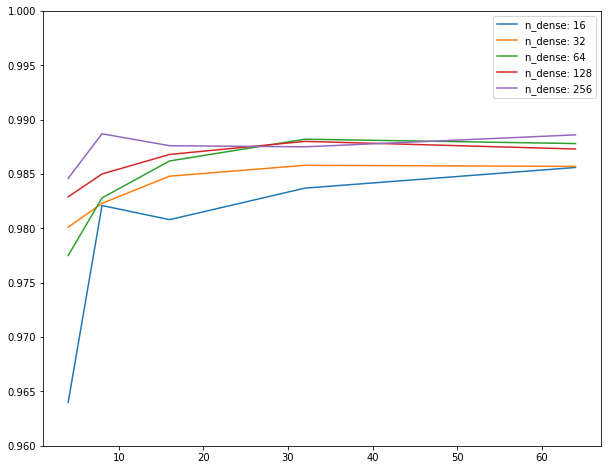

In [62]:
plt.gcf().set_size_inches([10,8])
for i in range(5):
    plt.plot(2**(np.array(exponents)+1), [max(hist['val_acc']) for hist in histories_single_conv[i*5:i*5+5]], label='n_dense: %d'%dense_ns[i])
plt.legend()
plt.ylim(0.96, 1.0)

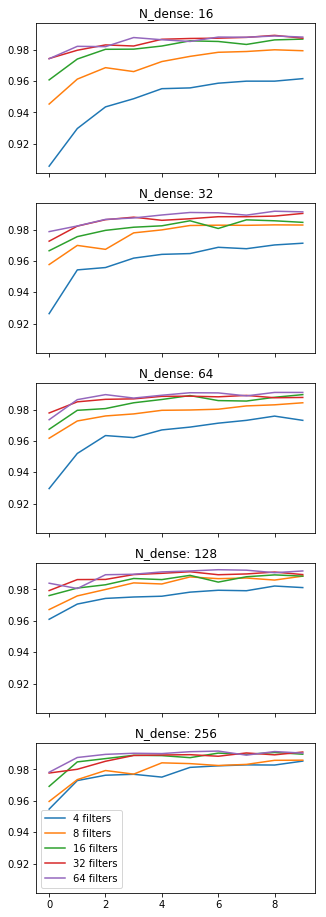

In [49]:
fig, ax = plt.subplots(5, sharex=True, sharey=True, figsize=[5,16])
for i in range(5):
    for j in range(5):
        ax[i].plot(histories[i*5+j]['val_acc'], label='%d filters'%(2**(exponents[j]+1)))
        ax[i].set_title('N_dense: %d'%dense_ns[i])
ax[-1].legend()